<a href="https://colab.research.google.com/github/Meghashyamt/Heart-Disease/blob/master/Heart_Disease_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data to Improve Process


**Data Description**

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [0]:
!git clone https://github.com/Meghashyamt/Heart-Disease

fatal: destination path 'Heart-Disease' already exists and is not an empty directory.


In [0]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [0]:
data = pd.read_csv("Heart-Disease/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.shape

(303, 14)

In [0]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

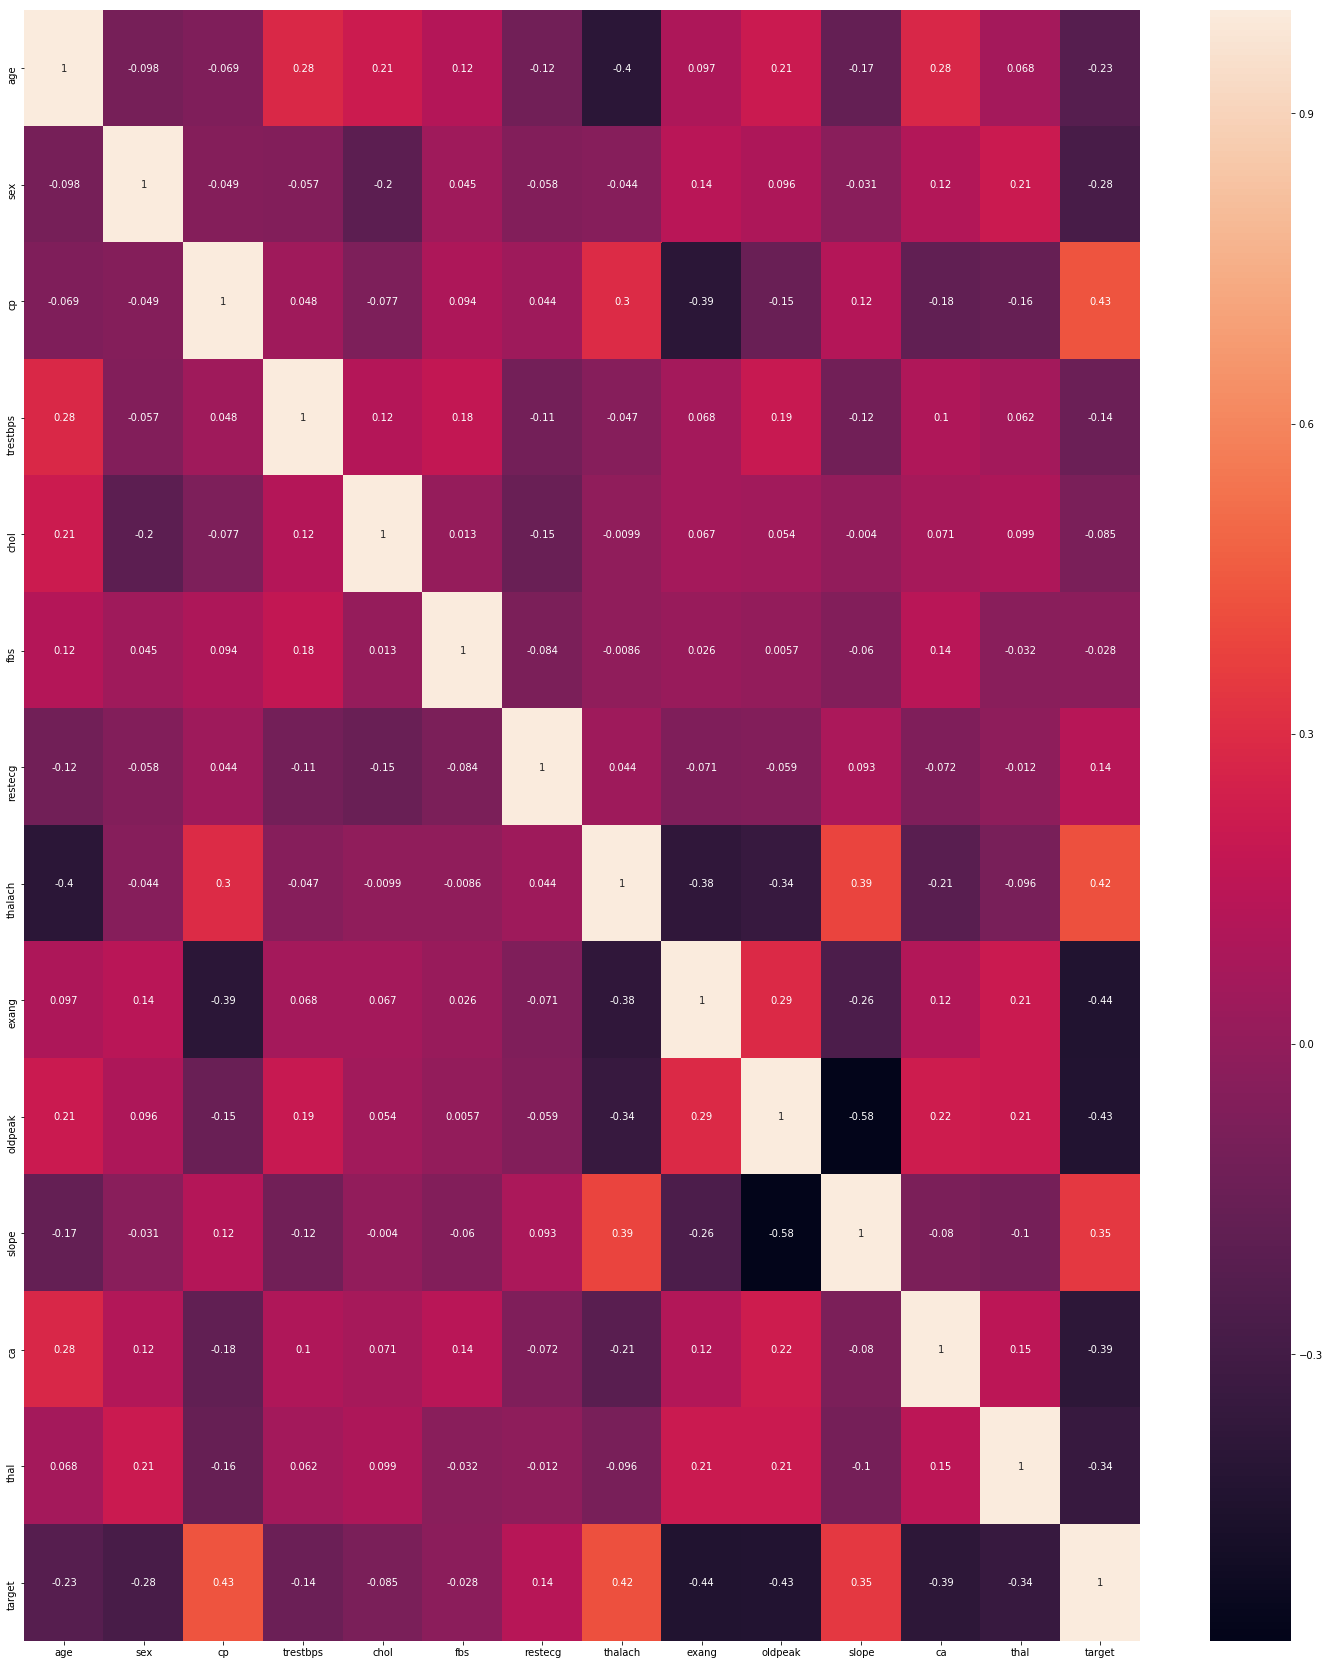

In [0]:
plt.figure(figsize=(25, 30))
ax = sb.heatmap(data.corr(), annot=True)

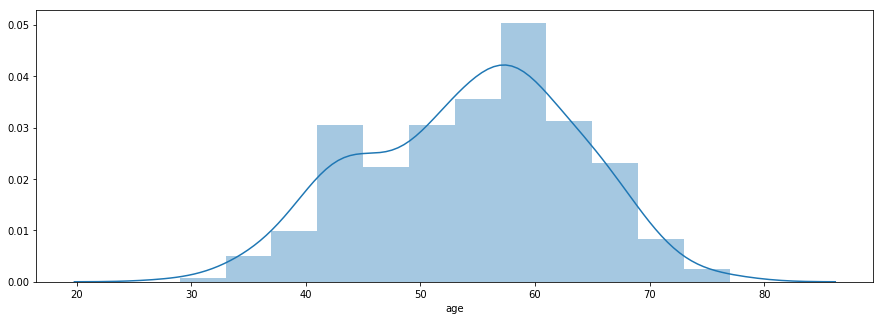

In [0]:
sb.distplot(data['age'])

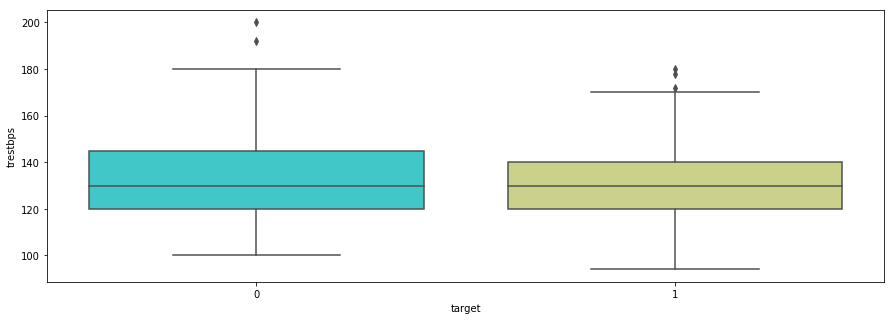

In [0]:
sb.boxplot(x="target", y="trestbps", data=data,palette='rainbow')

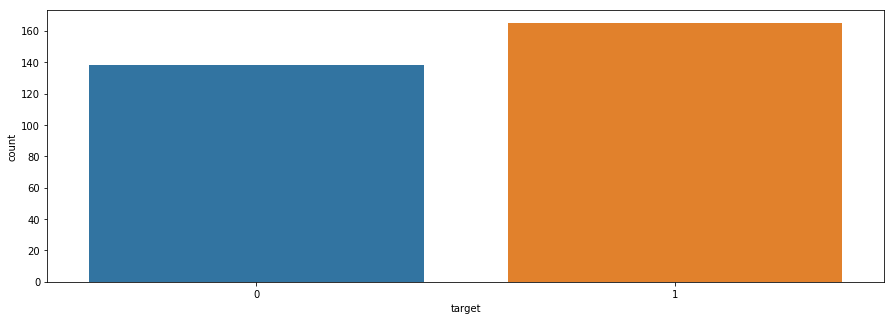

In [0]:
sb.countplot(data.target)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X= data.iloc[:,[1,2,3,4,6,8,9,12]]
y=data.target

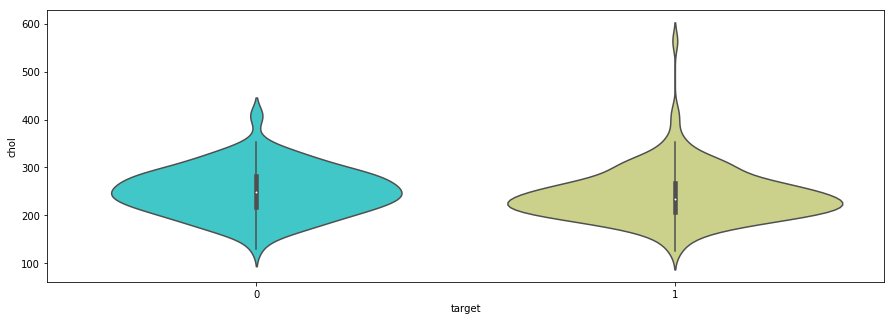

In [0]:
sb.violinplot(x="target", y="chol", data=data,palette='rainbow')

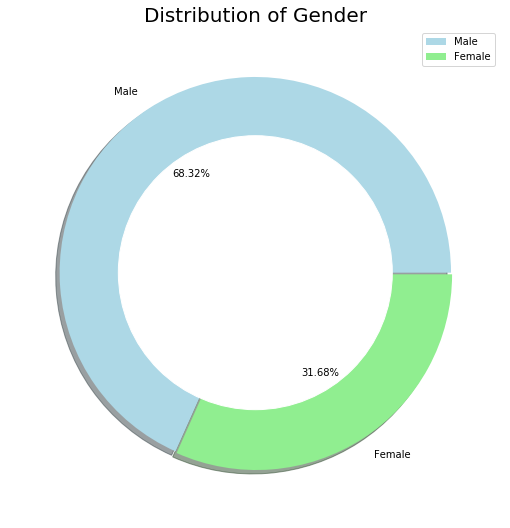

In [0]:
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

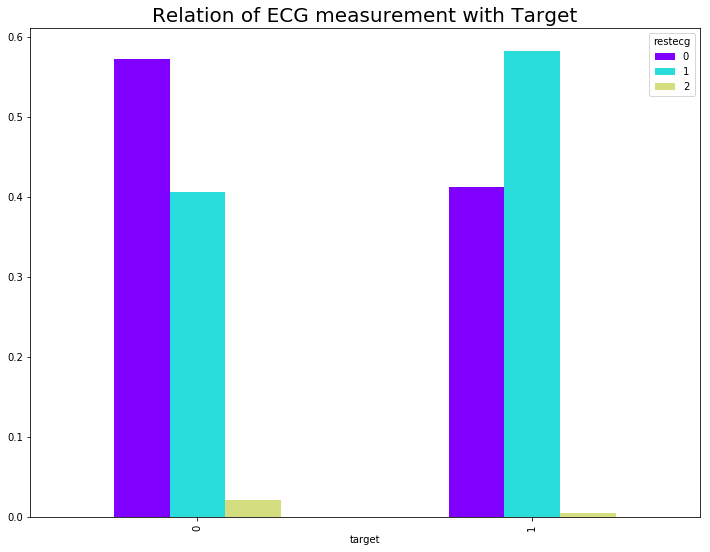

In [0]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

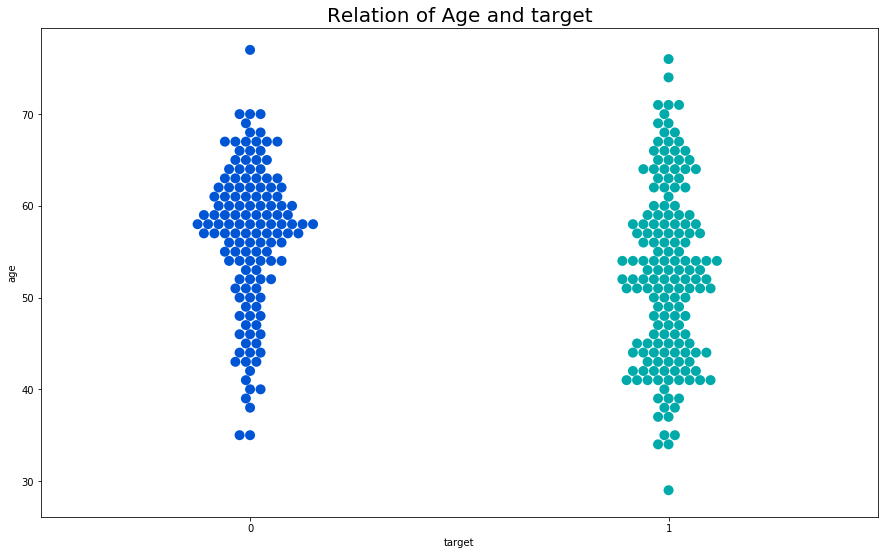

In [0]:
plt.rcParams['figure.figsize'] = (15, 9)
sb.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

In [0]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.30, random_state=10)

In [0]:
# Use Dictornary for All Algorithms in one Line
classifiers={'Support Vector Machine'      : SVC(C =10, kernel= 'linear'),
             'Decision Tree'               : DecisionTreeClassifier(),    
             'XGBoost'                     : XGBClassifier(),
             'Random Forest'               : RandomForestClassifier(),
             'Logistic Regression'         : LogisticRegression()}
             #'KNN'                         : KNeighborsClassifier(n_neighbors=7)
             

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
#For looping for All Model in one Line
print('\033[1m'+"Model\t\t\t\t\t\tAccuracy\n")
for name,model in classifiers.items():
    model=model
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print("{} :\t\t {}".format(name,score))

Model						Accuracy

Support Vector Machine :		 0.7692307692307693
Decision Tree :		 0.7362637362637363
XGBoost :		 0.7472527472527473
Random Forest :		 0.7252747252747253
Logistic Regression :		 0.7912087912087912


In [0]:
predict= model.predict(X_test)

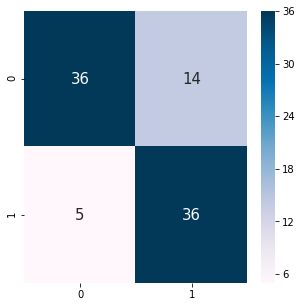

In [0]:
cm = confusion_matrix(y_test, predict)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [0]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.72
Specificity :  0.8780487804878049


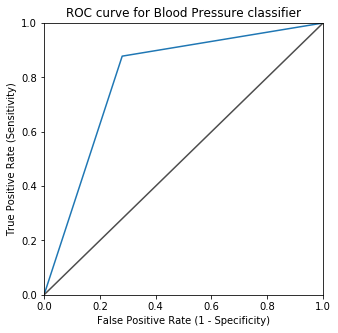

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [0]:
#from sklearn.model_selection import GridSearchCV

In [0]:
#Grid Search  to find the value from kernel , c , gamma
#parameters=[{'kernel':['linear'], 'C':[1,10,100,1000,10000]},
         #  {'kernel':['rbf'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]

In [0]:
#grid_model_svc= GridSearchCV(SVC(), parameters)
#grid_model_svc.fit(X_train, y_train)
#grid_model_svc.best_score_

In [0]:
#grid_model_svc.best_params_